<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%B0%D1%87_%D0%A1%D0%92%D0%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение необходимых библиотек

In [44]:
!pip install scikit-rf

In [45]:
import scipy.constants as const
import scipy.optimize as opt
import scipy.special as sp

from math import sqrt,sin,tan,cos,pi,radians,degrees,log,log10,atan

import sympy

import numpy as np

import matplotlib.pyplot as plt

import skrf as rf
rf_math = rf.mathFunctions



import plotly
import plotly.graph_objs as go
import plotly.express as px


# Исходное ТЗ

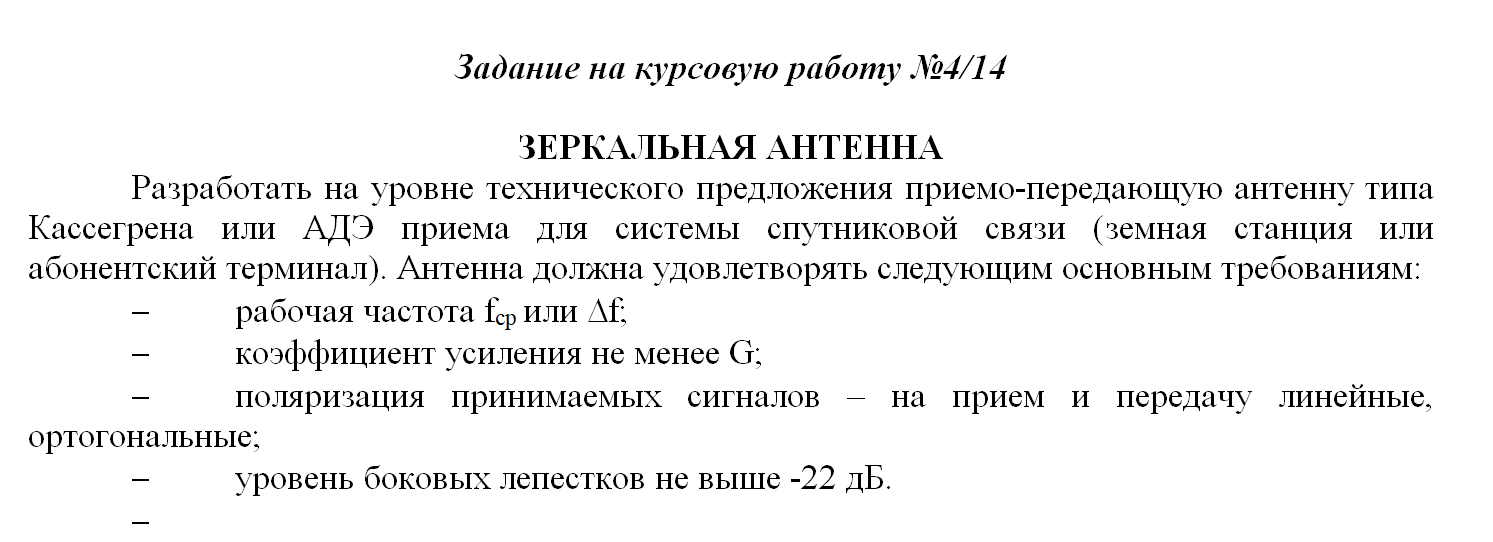

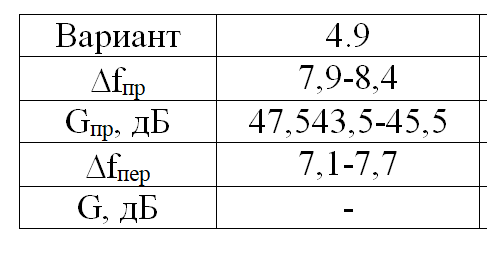

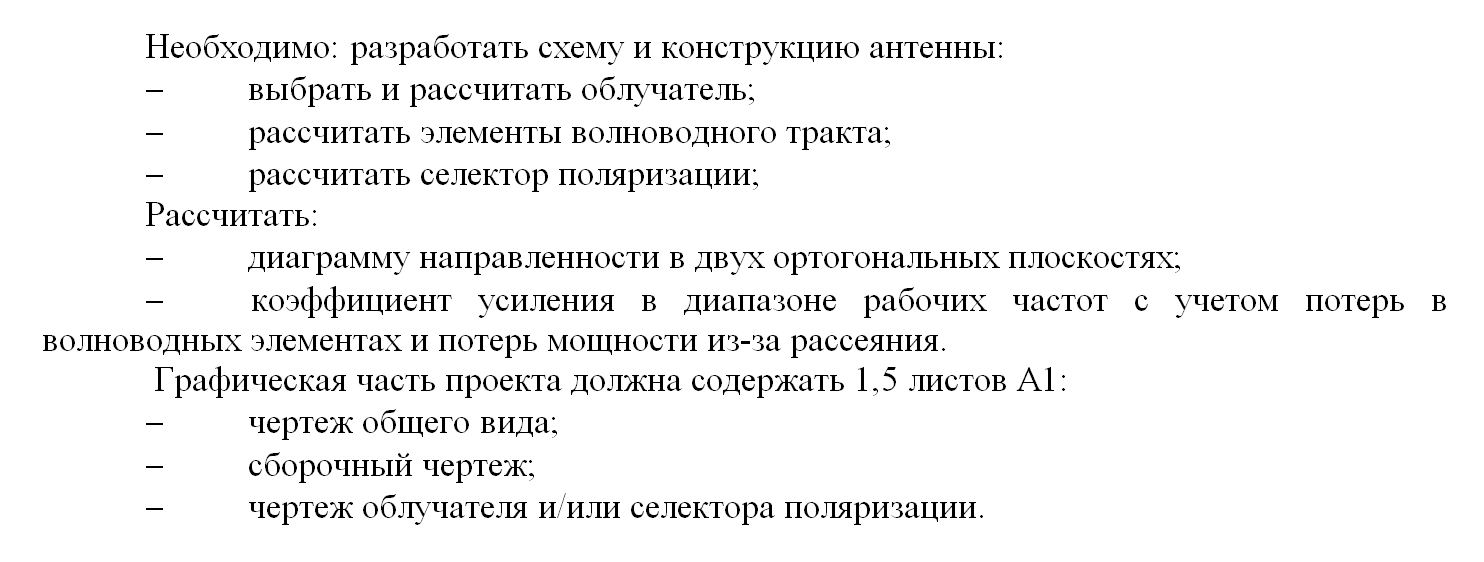

Зададим начальные условия расчета

In [46]:
f_lim = 8.3e9 #задаем частоту на заданном интервале
nu = 0.5 #КИП
G_lim_dB = 36 #КУ в дБ

# Расчет размеров антенны

In [47]:
#Функция перевода из дБ в разы
From_dB_10 = lambda x: 10**(x/10)

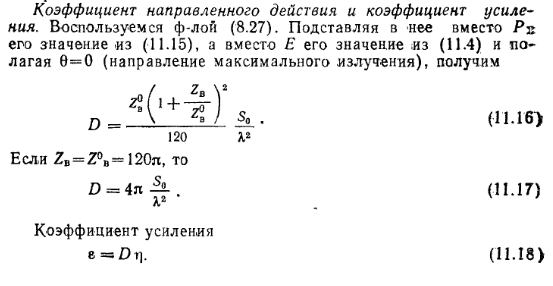

Найдем площадь, а затем диаметр излучателя используя КУ

In [48]:
G_lim = From_dB_10(G_lim_dB) #переводим КУ из дБ в разы
lambda_lim = const.c/f_lim #считаем соответвсующую длинну волны
S = G_lim*lambda_lim**2/(4*const.pi*nu)
D = sqrt(4*S/(const.pi)) 
D_0 = D

S = pi*R^2 = pi*D^2/4

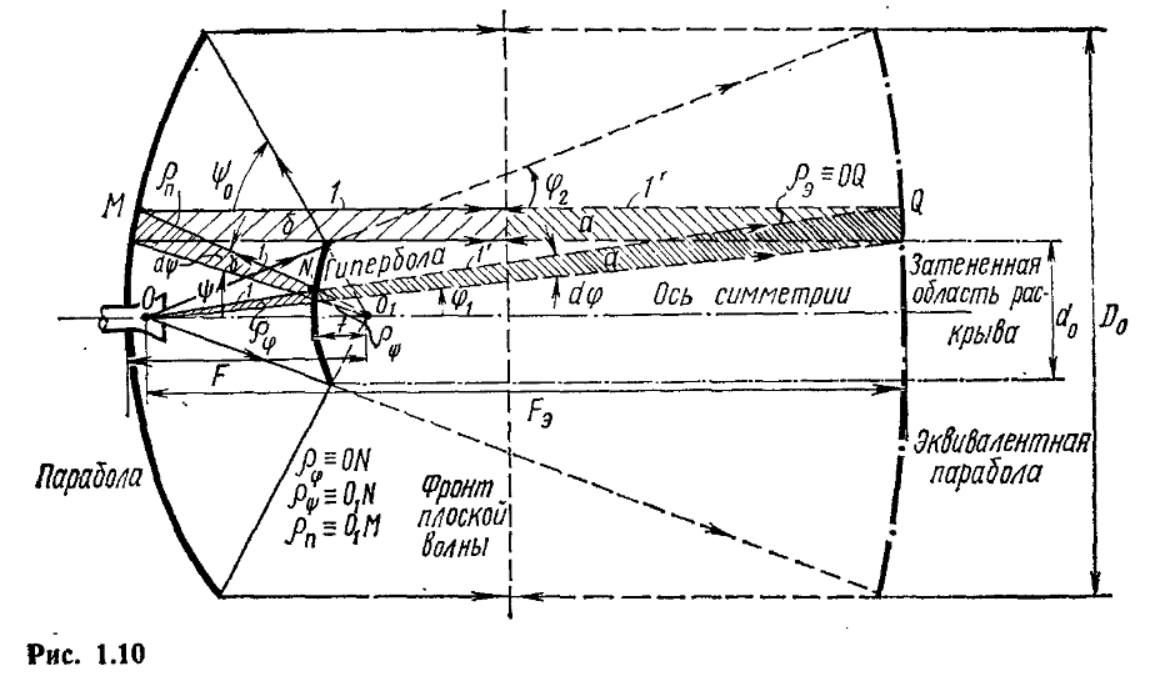

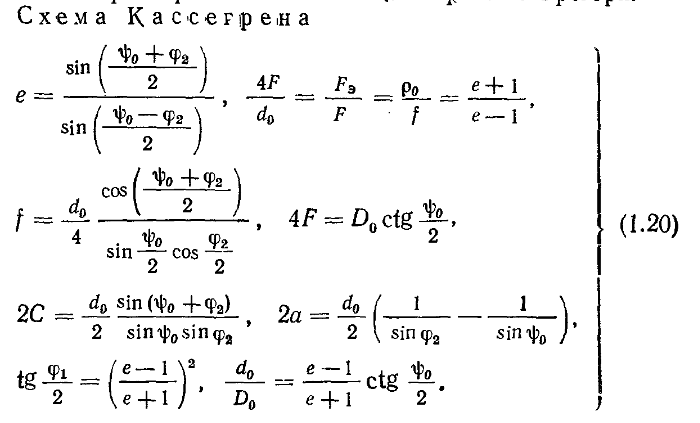

In [49]:
#psi_0 = rf_math.degree_2_radian(78.19)
#varphi_2 = rf_math.degree_2_radian(15)

#задаем начальные значения произвольно
# 87,10
psi_0 = rf_math.degree_2_radian(87)
varphi_2 = rf_math.degree_2_radian(10)

#проводим вычисления параметров антенны
e = sin((psi_0 + varphi_2)/2)/sin((psi_0 - varphi_2)/2)
d_0 = D_0*(e - 1)/(e + 1)*1/tan(psi_0/2)
f = d_0*cos((psi_0 + varphi_2)/2)/(4*sin(psi_0/2)*cos(varphi_2/2))
F = D_0/(4*tan(psi_0/2))
F_eqv = 4*F**2/d_0

In [50]:
#проверяем условия
[
 e == sin((psi_0 + varphi_2)/2)/sin((psi_0 - varphi_2)/2),
4*F/d_0 == F_eqv/F,
 f == d_0*cos((psi_0 + varphi_2)/2)/(4*sin(psi_0/2)*cos(varphi_2/2)),
 4*F == D_0/(tan(psi_0/2)),
 d_0/D_0 == (e - 1)/(e + 1)*1/tan(psi_0/2)
]

[True, True, True, True, True]

In [51]:
#найдем соотношения
D_0/d_0

10.293147850104265

In [52]:
#задание кртвой второго порядка
second_order_curve = lambda f,e,psi: f*(1 + e)/(1 + e*cos(psi))

#конвертация координат из полярной СК в декартову(прямоугольную)
def RPhi_to_XY(r,phi):
  return {"x":r*cos(phi),
          "y":r*sin(phi)}

#задание углов раствора зеркал
angel_of_mirror = lambda x,phi: tan(phi)*x 

In [53]:
#задаем данные раствора углов для
#малого и большого зеркал антенны
psi_d = np.linspace(-psi_0,psi_0,1000)
#эквивалентного зеркала антенны
psi_d_phi = np.linspace(-varphi_2,varphi_2,1000) 

In [54]:
#вычисляем данные малого зеркала в полярной СК и переводим в Декартову
small_mirror_d = np.vectorize(second_order_curve)(f,e,psi_d)
small_mirror_d = np.vectorize(RPhi_to_XY)(small_mirror_d,psi_d)

small_mirror_d_x = np.array([i["x"] for i in small_mirror_d])
small_mirror_d_y = np.array([i["y"] for i in small_mirror_d])

In [55]:
#вычисляем данные большого зеркала в полярной СК и переводим в Декартову
big_mirror_d = np.vectorize(second_order_curve)(F,e,psi_d)
big_mirror_d = np.vectorize(RPhi_to_XY)(big_mirror_d,psi_d)

big_mirror_d_x = np.array([i["x"] for i in big_mirror_d])
big_mirror_d_y = np.array([i["y"] for i in big_mirror_d])

In [56]:
#вычисляем данные эквивалентного зеркала в полярной СК и переводим в Декартову
eqv_mirror_d = np.vectorize(second_order_curve)(F_eqv,e,psi_d_phi)
eqv_mirror_d = np.vectorize(RPhi_to_XY)(eqv_mirror_d ,psi_d_phi)

eqv_mirror_d_x = np.array([i["x"] for i in eqv_mirror_d])
eqv_mirror_d_y = np.array([i["y"] for i in eqv_mirror_d])

In [57]:
#вычисляем данные углов экивалентного зеркала
eqv_mirror_angel_x = np.linspace(0,F_eqv,100)
eqv_mirror_angel_y = np.vectorize(angel_of_mirror)(eqv_mirror_angel_x,varphi_2)

#вычисляем данные углов основного зеркала
main_mirror_angel_x = np.linspace(0,F,100)
main_mirror_angel_y = np.vectorize(angel_of_mirror)(main_mirror_angel_x,pi - psi_0)

In [58]:
#вычислим положение фокус эквивалентного зеркала
data_for_eqv_focus = (second_order_curve(f,e,psi_0))
focus_of_eqv_mirror = F - RPhi_to_XY(data_for_eqv_focus,psi_0)["x"] - RPhi_to_XY(data_for_eqv_focus,psi_0)["y"]/tan(varphi_2)

In [59]:
#найдем координаты концов зеркал
end_of_small_mirror = F - RPhi_to_XY(second_order_curve(f,e,psi_0),psi_0)["x"] 
end_of_big_mirror = F - RPhi_to_XY(second_order_curve(F,e,psi_0),psi_0)["x"] 
end_of_eqv_mirror = focus_of_eqv_mirror + RPhi_to_XY(second_order_curve(F_eqv,e,varphi_2),varphi_2)["x"] 

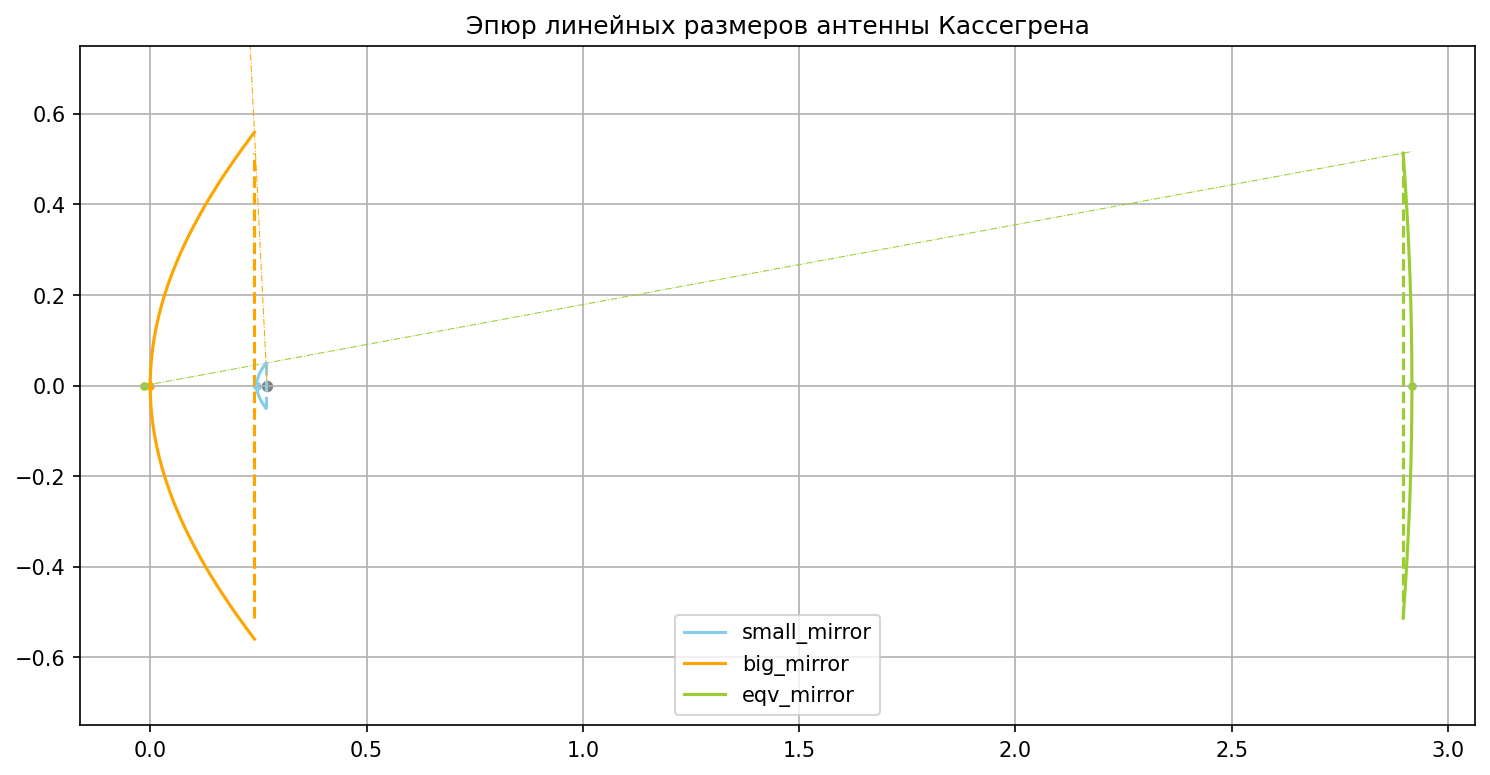

In [60]:
%matplotlib inline
plt.figure(dpi = 150,figsize = (12,6))
plt.title("Эпюр линейных размеров антенны Кассегрена")
#задаем фокусные расстояния
#plt.scatter([F,0,focus_of_eqv_mirror + F_eqv,F - f,focus_of_eqv_mirror],
#            [0,0,0                          ,0    ,0],
#            s = 10,
#            )

plt.scatter([0],
            [0],
            s = 10,
            color = "orange",
            )


plt.scatter([focus_of_eqv_mirror + F_eqv,focus_of_eqv_mirror],
            [0                          ,0],
            s = 10,
            color = "YellowGreen",
            )


plt.scatter([F - f],
            [0    ],
            s = 10,
            color = "skyblue",
            )


plt.scatter([F],
            [0],
            s = 20,
            color = "gray",
            )


#задаем высоту зеркал


#plt.vlines(0,-1*D_0/2,D_0/2,
#           color = "orange",
#           linestyles = "--",
#           )
#plt.vlines(F,-1*d_0/2,d_0/2,
#           color = "skyblue",
#           linestyles = "--",
#           )
#plt.vlines(focus_of_eqv_mirror + F_eqv,-1*D_0/2,D_0/2,
#           color = "YellowGreen",
#           linestyles = "--",
#           )


#контрольная линия для проверки расчетов
plt.vlines(end_of_small_mirror,-1*d_0/2,d_0/2,
           color = "skyblue",
           linestyles = "--",
           )

plt.vlines(end_of_big_mirror,-1*D_0/2,D_0/2,
           color = "orange",
           linestyles = "--",
           )

plt.vlines(end_of_eqv_mirror,-1*D_0/2,D_0/2,
           color = "YellowGreen",
           linestyles = "--",
           )


#задаем углы зеркал

plt.plot(eqv_mirror_angel_x + focus_of_eqv_mirror,
         eqv_mirror_angel_y,
         color = "YellowGreen",
         linestyle = "dashdot",
         linewidth = 0.5,
         )

plt.plot(main_mirror_angel_x,
         main_mirror_angel_y + tan(psi_0)*F,
         color = "orange",
         linestyle = "dashdot",
         linewidth = 0.5,
         )




#задаем зеркала
plt.plot(-1*small_mirror_d_x + F,
         small_mirror_d_y,
         color = "skyblue",
         label = "small_mirror",
         )

plt.plot(-1*big_mirror_d_x + F,
         big_mirror_d_y,
         color = "orange",
         label = "big_mirror",
         )

plt.plot(eqv_mirror_d_x + focus_of_eqv_mirror,
         eqv_mirror_d_y,
         color = "YellowGreen",
         label = "eqv_mirror",
         )

plt.ylim([-0.75,0.75])
plt.legend()
plt.grid(True)


In [61]:
fig = go.Figure(layout_yaxis_range=[-0.75,0.75])

#задаем фокусные расстояния
fig.add_trace(go.Scatter(x=[0],
                         y=[0],
                         marker = {'color' : 'orange'}))

fig.add_trace(go.Scatter(x=[focus_of_eqv_mirror + F_eqv,focus_of_eqv_mirror],
                         y=[0,0],
                         mode="markers",
                         marker = {'color' : 'YellowGreen'}))

fig.add_trace(go.Scatter(x=[F - f],
                         y=[0],
                         mode="markers",
                         marker = {'color' : 'skyblue'}))

fig.add_trace(go.Scatter(x=[F],
                         y=[0],
                         mode="markers",
                         marker = {'color' : 'gray'}))


#контрольная линия для проверки расчетов

fig.add_trace(go.Scatter(x=[end_of_small_mirror, end_of_small_mirror], 
                         y=[-1*d_0/2,d_0/2],  
                         line_dash="dash",
                         marker = {'color' : 'skyblue'}))
fig.add_trace(go.Scatter(x=[end_of_big_mirror, end_of_big_mirror], 
                         y=[-1*D_0/2,D_0/2], 
                         line_dash="dash",
                         marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=[end_of_eqv_mirror,end_of_eqv_mirror],
                         y=[-1*D_0/2,D_0/2],
                        line_dash="dash",
                         marker = {'color' : 'YellowGreen'}))



#задаем зеркала
fig.add_trace(go.Scatter(x=-1*small_mirror_d_x + F, 
                         y=small_mirror_d_y,  
                         name='small_mirror',
                         marker = {'color' : 'skyblue'}))
fig.add_trace(go.Scatter(x=-1*big_mirror_d_x + F, 
                         y=big_mirror_d_y, 
                         name='big_mirror',
                         marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=eqv_mirror_d_x + focus_of_eqv_mirror,
                         y=eqv_mirror_d_y,
                         name='eqv_mirror',
                         marker = {'color' : 'YellowGreen'}))


#задаем углы зеркал

fig.add_trace(go.Scatter(x=eqv_mirror_angel_x + focus_of_eqv_mirror, 
                         y=eqv_mirror_angel_y, 
                         line_dash="dash",
                         marker = {'color' : 'YellowGreen'}))
fig.add_trace(go.Scatter(x=main_mirror_angel_x,
                         y=main_mirror_angel_y + tan(psi_0)*F,
                         line_dash="dash",
                         marker = {'color' : 'orange'}))




fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Эпюр линейных размеров антенны Кассегрена",
                  xaxis_title="Ox [м]",
                  yaxis_title="Oy [м]",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [62]:
import IPython.display
fr = 2
IPython.display.Markdown("$f_r = %i$ GHz"%(fr))

$f_r = 2$ GHz

In [63]:
from IPython.display import Markdown as md
fr = 2
md("$f_r = %i$ GHz"%(fr))

$f_r = 2$ GHz

$f_r = 2 + Γ$

# Расчет ДН антенны

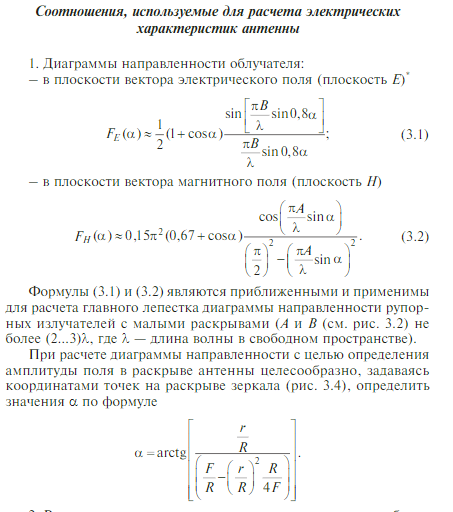

In [64]:
#задаем ДН облучаетеля
F_E = lambda alpha, B: 1/2*(1 + cos(alpha))*sin((pi*B)/(lambda_lim) * sin(0.8*alpha))/(pi*B/lambda_lim*sin(0.8*alpha))
F_H = lambda alpha, A: 0.15*pi**2*(0.67 + cos(alpha))*cos(pi*A/lambda_lim*sin(alpha))/((pi/2)**2 - (pi*A/lambda_lim*sin(alpha))**2)

In [65]:
tol = 1e-3 #точность решения
dB_for_irradiator = -10 #задаем в дб нормировочный размер для излучателя
#задаем уравнение для поиска размеров рупора
F_E_B = lambda B: 20*log(F_E(varphi_2,B)) - dB_for_irradiator
#F_E_B(89*const.milli)
B = opt.root(F_E_B,100*const.milli,tol = tol)["x"][0]
#B = 150e-3

In [66]:
#задаем уравнение для поиска размеров рупора
F_H_A = lambda A: 20*log(F_H(varphi_2,A)) - dB_for_irradiator
#F_H_A(89*const.milli)
A = opt.root(F_H_A,100*const.milli,tol = tol)["x"][0]
#A = 200e-3

In [67]:
#переобьявляем ДН с учетом размера рупора
#A = 20*const.milli
#B = 20*const.milli
#F_E = lambda alpha: 1/2*(1 + cos(alpha))*sin((pi*B)/(lambda_lim) * sin(0.8*alpha))/(pi*B/lambda_lim*sin(0.8*alpha))
#F_H = lambda alpha: 0.15*pi**2*(0.67 + cos(alpha))*cos(pi*A/lambda_lim*sin(alpha))/((pi/2)**2 - (pi*A/lambda_lim*sin(alpha))**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning:

invalid value encountered in log



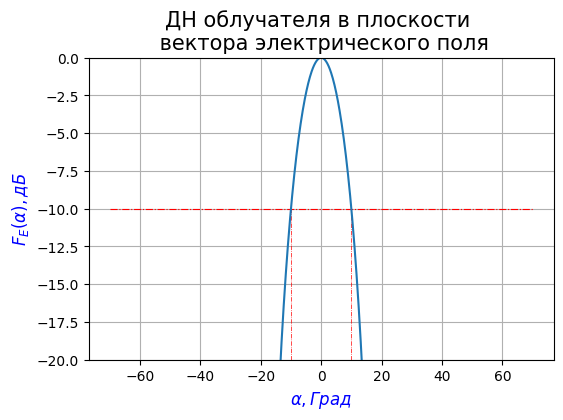

In [68]:
alpha = np.linspace(radians(-70),radians(+70),1000)
conv_alpha = list(map(degrees,alpha))
y_lim_min = dB_for_irradiator*2


plt.figure(dpi=100,figsize=(6,4))

plt.vlines(degrees(varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.vlines(degrees(-varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.hlines(dB_for_irradiator,min(conv_alpha),max(conv_alpha),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot((conv_alpha), 20*np.log(np.vectorize(F_E)(alpha,B)), label='$F_E(\alpha)$')



plt.title("ДН облучателя в плоскости \n вектора электрического поля", fontsize=15)
plt.xlabel('$α, Град$', fontsize=12, color='blue')
plt.ylabel('$F_E(α), дБ$', fontsize=12, color='blue')

plt.ylim([y_lim_min,0])
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')

In [69]:
#np.round(np.linspace(radians(-70),radians(+70),1000),4)

In [70]:
#np.linspace(radians(-70),radians(+70),1000)

In [71]:
#np.log(np.vectorize(F_E)(alpha,B))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in log



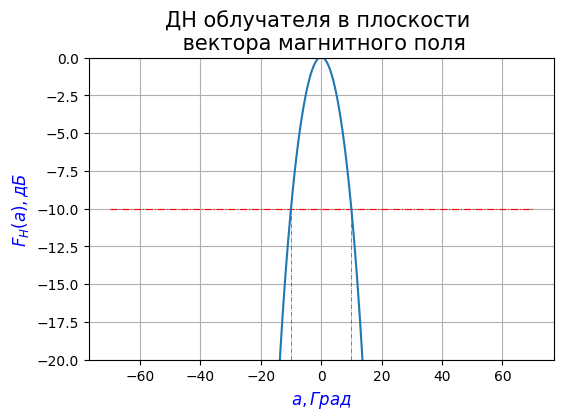

In [72]:
plt.figure(dpi=100,figsize=(6,4))

plt.vlines(degrees(varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.vlines(degrees(-varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.hlines(dB_for_irradiator,min(conv_alpha),max(conv_alpha),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot(conv_alpha, 20*np.log(np.vectorize(F_H)(alpha,A)), label='$F_E(\alpha)$')



plt.title("ДН облучателя в плоскости \n вектора магнитного поля", fontsize=15)
plt.xlabel('$a, Град$', fontsize=12, color='blue')
plt.ylabel('$F_H(a), дБ$', fontsize=12, color='blue')
#plt.legend()
plt.ylim([y_lim_min,0])
plt.grid(True)
#plt.text(15, 4, 'grow up!')

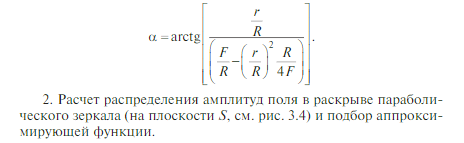

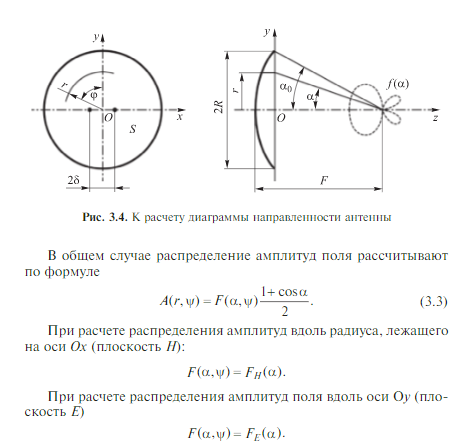

In [73]:
#F_E = lambda alpha: F_E(alpha,B)
#F_H = lambda alpha: F_H(alpha,A)

In [74]:
R = D_0/2
F_ = F_eqv
alpha = lambda r: atan((r/R)/(F_/R - (r/R)**2*R/(4*F_)))
A_E = lambda r: (1 + cos(alpha(r)))/4*F_E(alpha(r),B)
A_H = lambda r: (1 + cos(alpha(r)))/4*F_H(alpha(r),A)
#A = lambda r: A_E(r) + A_H(r) 
r = np.linspace(-R,R,1000)

In [75]:
data_A_E = list(map(A_E,r))
data_A_H = list(map(A_H,r))

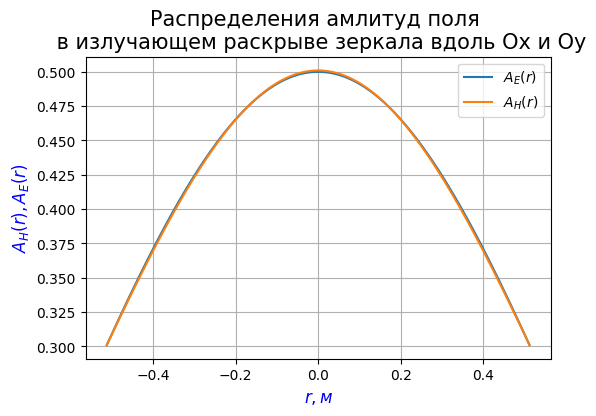

In [76]:
plt.figure(dpi=100,figsize=(6,4))
plt.plot(r, data_A_E, label='$A_E(r)$')
plt.plot(r, data_A_H, label='$A_H(r)$')
plt.title("Распределения амлитуд поля \n в излучающем раскрыве зеркала вдоль Ox и Оу", fontsize=15)
plt.xlabel('$r,м$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$A_H(r),A_E(r)$', fontsize=12, color='blue')
plt.grid(True)

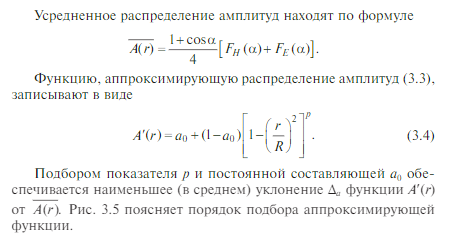

In [77]:
data_A_E = np.array(data_A_E)
data_A_H = np.array(data_A_H)
data_A = data_A_E + data_A_H
#len(data_A),len(r)

In [78]:
a_0 = A_E(R) + A_H(R)
A_prime = lambda r,p: a_0 + (1 - a_0)*(1 - (r/R)**2)**p
#opt_A_prime = lambda x,a: A_prime(x,a)
#min_func = lambda p: data_A - np.array([A_prime(p,i) for i in r])
#min_func = lambda p: data_A -  a_0 + (1 - a_0)*p
p = opt.curve_fit(A_prime,r,data_A)
#min_func(1)
#round(p[0][0],0)
p 
#1.9
#p = [[1.5]]

(array([1.12761712]), array([[5.6658257e-07]]))

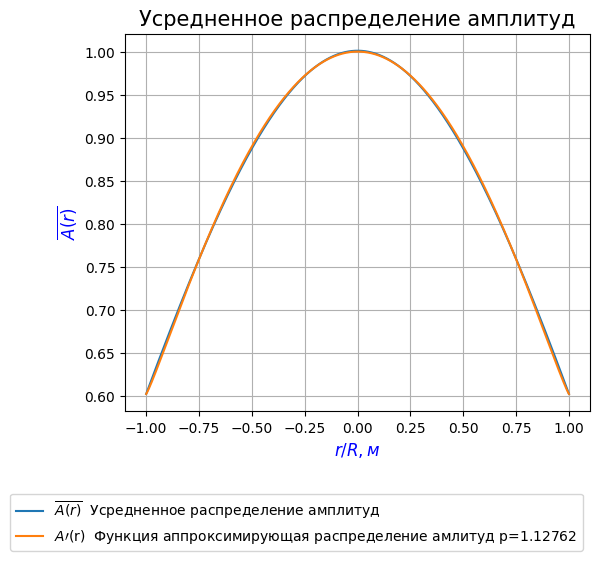

In [79]:
plt.figure(figsize=(6,5),dpi = 100)
plt.plot(r/R, data_A, label='$\overline{A(r)}$  Усредненное распределение амплитуд')
#plt.plot(r/R, A_prime(r,round(p[0][0],0)), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={round(p[0][0],0)}')
plt.plot(r/R, A_prime(r,round(p[0][0],5)), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={round(p[0][0],5)}')
#plt.plot(r/R, A_prime(r,2), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={2}')
plt.title("Усредненное распределение амплитуд", fontsize=15)
plt.xlabel('$r/R,м$', fontsize=12, color='blue')
plt.legend(bbox_to_anchor=(1, -0.2))
plt.ylabel('$\overline{A(r)}$', fontsize=12, color='blue')
plt.grid(True)

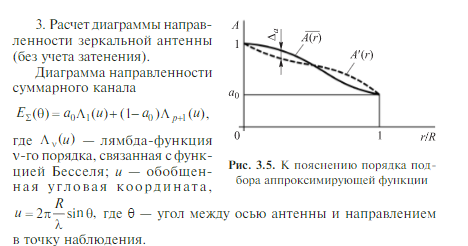

In [80]:
lmbda = lambda nu,u: round(abs(sp.lmbda(nu,u)[0][int(nu)]*1e3),5) #лямбда функция
u = lambda theta: 2*pi*R/lambda_lim*sin(theta) #обобшенная угловая координата
E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda((round(p[0][0],5) + 1),u(theta))#ДН суммарного канала
#E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda(int(2),u(theta))#ДН суммарного канала

theta = np.linspace(radians(-20), radians(20),1000)
data_E_sum_theta = 20*np.log10(np.array(list(map(E_sum_theta,theta))))
data_E_sum_theta = data_E_sum_theta - max(data_E_sum_theta)


theta = np.array(list(map(degrees,theta)))#конвертация радиан в градусы

In [81]:
#for i in range(len(data_E_sum_theta)):
#  if data_E_sum_theta[i] < -15:
#   data_E_sum_theta[i] -=5
#int(0.5)
#theta = np.linspace(radians(-20), radians(20),1000)
#E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda((round(p[0][0],5)),u(theta))#ДН суммарного канала
#data_E_sum_theta = 20*np.log10(np.array(list(map(E_sum_theta,theta))))
#data_E_sum_theta
#lmbda(4,10)
#sp.lmbda(4,7.8)

(-40.0, 0.0)

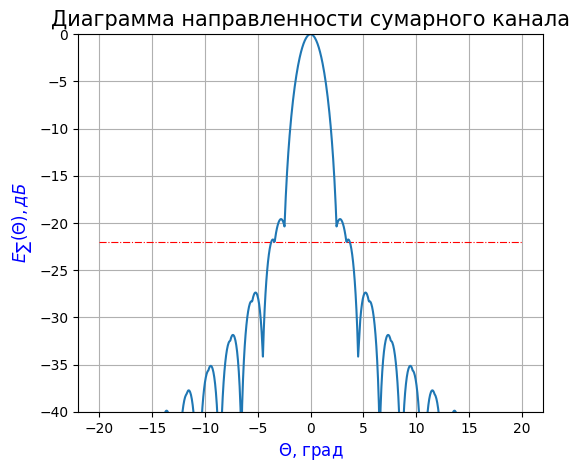

In [82]:
plt.figure(figsize=(6,5),dpi = 100)

plt.hlines(-22,min(theta),max(theta),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot(theta, data_E_sum_theta, label='$\overline{A(r)}$')


plt.title("Диаграмма направленности сумарного канала", fontsize=15)
plt.xlabel('$Θ$, град', fontsize=12, color='blue')
#plt.legend()
plt.ylabel('$E_{\sum}(Θ), дБ$', fontsize=12, color='blue')
plt.grid(True)
plt.ylim([-40,0])

In [83]:
fig = px.line(x=theta, y=data_E_sum_theta,
              labels={'x':'$Θ$, град', 'y':'$E_{\sum}(Θ), дБ$'},
              title="Диаграмма направленности сумарного канала",
              )

fig.add_hline(y=-22,
              line_width=0.5, 
              line_dash="dash", 
              line_color="red")

fig.show()

# Расчет КНД

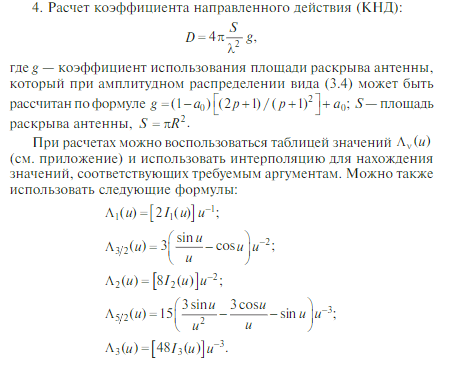

In [84]:
S = const.pi*R**2
g = (1 - a_0)*(2*p[0][0] + 1)/(p[0][0] + 1)**2 + a_0
D = 4*const.pi*S/lambda_lim**2*g

In [85]:
#D[0],20*log10(D[0])

In [86]:
D_0,F_eqv

(1.0259063918944946, 2.931540929272815)

# Данные для конструирования

In [90]:
import pandas as pd
pd.DataFrame({"F":[F],
             "f":[f],
             "D_0":[D_0],
             "d_0":[d_0],
             "varphi_2":[varphi_2],
             "psi_0":[psi_0],
              })
             

,F,f,D_0,d_0,varphi_2,psi_0
0,0.27027,0.024077,1.025906,0.099669,0.174533,1.518436
